In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import zipfile
from subprocess import check_output
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


import matplotlib
matplotlib.style.use('fivethirtyeight')

In [4]:
fandango = pd.read_csv('fandango_score_comparison.csv')
fandango.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [5]:
film_sorted = sorted(fandango['FILM'])
print film_sorted

["'71 (2015)", '5 Flights Up (2015)', 'A Little Chaos (2015)', 'A Most Violent Year (2014)', 'About Elly (2015)', 'Aloha (2015)', 'American Sniper (2015)', 'American Ultra (2015)', 'Amy (2015)', 'Annie (2014)', 'Ant-Man (2015)', 'Avengers: Age of Ultron (2015)', 'Big Eyes (2014)', 'Birdman (2014)', 'Black Sea (2015)', 'Black or White (2015)', 'Blackhat (2015)', 'Cake (2015)', 'Chappie (2015)', 'Child 44 (2015)', 'Cinderella (2015)', 'Clouds of Sils Maria (2015)', 'Danny Collins (2015)', 'Dark Places (2015)', 'Do You Believe? (2015)', 'Dope (2015)', 'Entourage (2015)', 'Escobar: Paradise Lost (2015)', 'Ex Machina (2015)', 'Fantastic Four (2015)', 'Far From The Madding Crowd (2015)', 'Fifty Shades of Grey (2015)', 'Focus (2015)', 'Furious 7 (2015)', 'Get Hard (2015)', 'Gett: The Trial of Viviane Amsalem (2015)', 'Hitman: Agent 47 (2015)', 'Home (2015)', 'Hot Pursuit (2015)', 'Hot Tub Time Machine 2 (2015)', "I'll See You In My Dreams (2015)", 'Infinitely Polar Bear (2015)', 'Inherent Vic

In [6]:
# Display list of keys (column names)

fandango.keys()

Index([u'FILM', u'RottenTomatoes', u'RottenTomatoes_User', u'Metacritic',
       u'Metacritic_User', u'IMDB', u'Fandango_Stars', u'Fandango_Ratingvalue',
       u'RT_norm', u'RT_user_norm', u'Metacritic_norm', u'Metacritic_user_nom',
       u'IMDB_norm', u'RT_norm_round', u'RT_user_norm_round',
       u'Metacritic_norm_round', u'Metacritic_user_norm_round',
       u'IMDB_norm_round', u'Metacritic_user_vote_count',
       u'IMDB_user_vote_count', u'Fandango_votes', u'Fandango_Difference'],
      dtype='object')

In [7]:
# WATCH OUT for the following typo: 'Metacritic_user_nom'

# Rename key

fandango.rename(columns={'Metacritic_user_nom':'Metacritic_user_norm'}, inplace=True)

fandango.keys()

Index([u'FILM', u'RottenTomatoes', u'RottenTomatoes_User', u'Metacritic',
       u'Metacritic_User', u'IMDB', u'Fandango_Stars', u'Fandango_Ratingvalue',
       u'RT_norm', u'RT_user_norm', u'Metacritic_norm',
       u'Metacritic_user_norm', u'IMDB_norm', u'RT_norm_round',
       u'RT_user_norm_round', u'Metacritic_norm_round',
       u'Metacritic_user_norm_round', u'IMDB_norm_round',
       u'Metacritic_user_vote_count', u'IMDB_user_vote_count',
       u'Fandango_votes', u'Fandango_Difference'],
      dtype='object')

In [8]:
# Set index
fandango.set_index('FILM')

# Sort by index
fandango.sort_values(by='FILM', ascending=True, inplace=True)

# Reset numerical index
fandango.reset_index(drop=True, inplace=True)

fandango.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,'71 (2015),97,82,83,7.5,7.2,3.5,3.5,4.85,4.10,...,3.60,5.0,4.0,4.0,4.0,3.5,60,24116,192,0.0
1,5 Flights Up (2015),52,47,55,6.8,6.1,4.0,3.6,2.60,2.35,...,3.05,2.5,2.5,3.0,3.5,3.0,6,2174,79,0.4
2,A Little Chaos (2015),40,47,51,7.0,6.4,4.0,3.9,2.00,2.35,...,3.20,2.0,2.5,2.5,3.5,3.0,7,4778,83,0.1
3,A Most Violent Year (2014),90,69,79,7.0,7.1,3.5,3.4,4.50,3.45,...,3.55,4.5,3.5,4.0,3.5,3.5,133,32166,675,0.1
4,About Elly (2015),97,86,87,9.6,8.2,4.0,3.6,4.85,4.30,...,4.10,5.0,4.5,4.5,5.0,4.0,23,20659,43,0.4


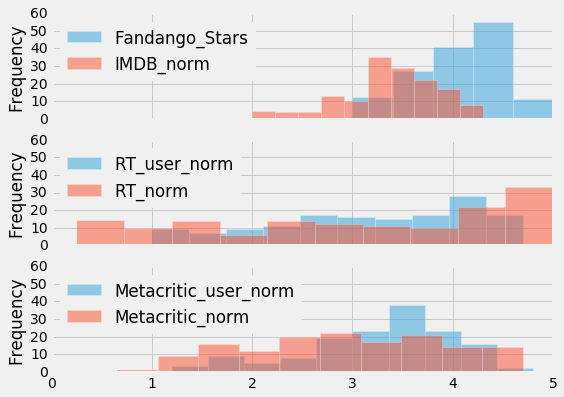

In [11]:
fig, axes = plt.subplots(nrows=3, sharex=True, sharey=True, figsize=(8.,6.))

fandango['Fandango_Stars'].plot.hist(alpha=0.5, bins=5, label='Fandango_Stars', ax=axes[0])
fandango['IMDB_norm'].plot.hist(alpha=0.5, bins=10, label='IMDB_norm', ax=axes[0])
axes[0].legend(loc='upper left')
axes[0].set_xlabel('Stars')
axes[0].set_xlim([0.,5.])
axes[0].set_ylim([0.,60.])

fandango['RT_user_norm'].plot.hist(alpha=0.5, bins=10, label='RT_user_norm', ax=axes[1])
fandango['RT_norm'].plot.hist(alpha=0.5, bins=10, label='RT_norm', ax=axes[1])
axes[1].legend(loc='upper left')
axes[1].set_title(' ')

fandango['Metacritic_user_norm'].plot.hist(alpha=0.5, bins=10, label='Metacritic_user_norm', ax=axes[2])
fandango['Metacritic_norm'].plot.hist(alpha=0.5, bins=10, label='Metacritic_norm', ax=axes[2])
axes[2].legend(loc='upper left')
axes[2].set_title(' ')

plt.subplots_adjust(hspace=0.2)

plt.show()
plt.close()



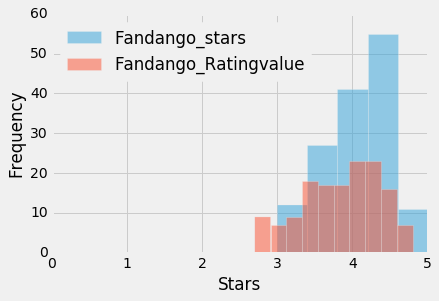

In [12]:
fig, axes = plt.subplots()
fandango['Fandango_Stars'].plot.hist(alpha=0.5, bins=5, label='Fandango_stars', ax=axes)
fandango['Fandango_Ratingvalue'].plot.hist(alpha=0.5, bins=10, label='Fandango_Ratingvalue', ax=axes)

axes.legend(loc='upper left')
axes.set_xlabel('Stars')
axes.set_xlim([0.,5.])
axes.set_ylim([0.,60.])
plt.show()
plt.close()


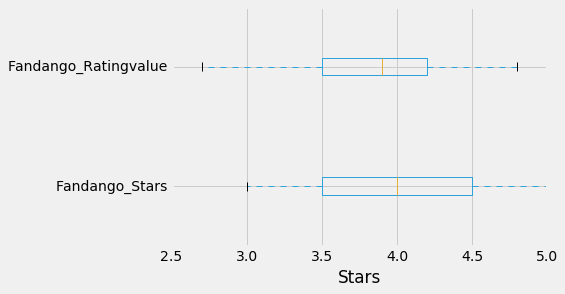

In [15]:
fig, axes = plt.subplots()

fandango[['Fandango_Stars', 'Fandango_Ratingvalue']].boxplot(vert=False)

axes.set_xlabel('Stars')

plt.show()
plt.close()

The history saving thread hit an unexpected error (OperationalError('database or disk is full',)).History will not be written to the database.


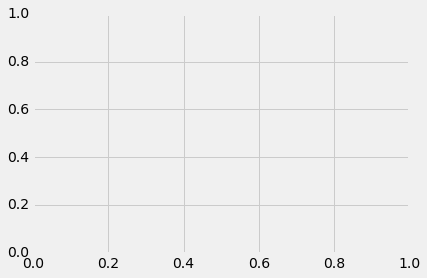

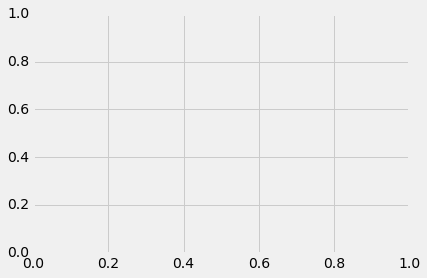

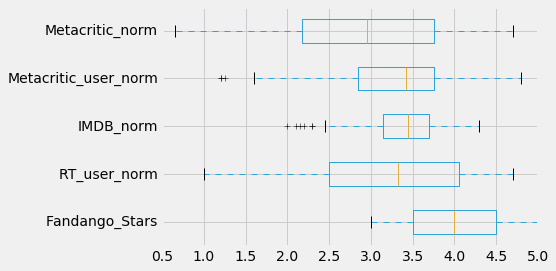

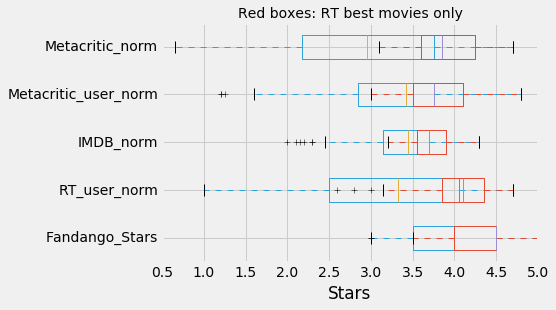

In [19]:


fig, axes = plt.subplots()

only_rt_80 = fandango['RT_norm'] >= 4.
rankings_list = ['Fandango_Stars', 'RT_user_norm', 'IMDB_norm', 'Metacritic_user_norm', 'Metacritic_norm']

with matplotlib.style.context('fivethirtyeight'):
    fandango[rankings_list].boxplot(vert=False)

with matplotlib.style.context('ggplot'):
    fandango[only_rt_80][rankings_lst].boxplot(vert=False)
axes.set_xlabel('Stars')

plt.title('Red boxes: RT best movies only', fontsize=14)

plt.show()
plt.close()
    

## [2] Correlation matrix

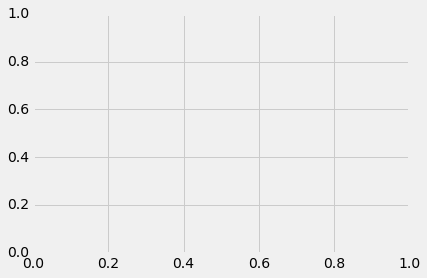

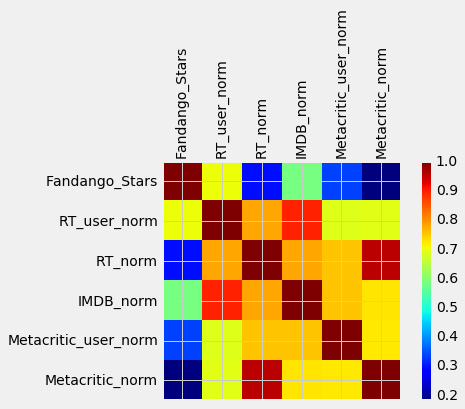

In [22]:
fig, axes = plt.subplots()

rankings_lst = ['Fandango_Stars', 'RT_user_norm', 'RT_norm', 'IMDB_norm', 'Metacritic_user_norm', 'Metacritic_norm']

cax = axes.matshow(fandango[rankings_lst].corr())

axes.set_yticklabels(['']+rankings_lst)
axes.set_xticklabels(['']+rankings_lst, rotation=90)

fig.colorbar(cax)

plt.show()
plt.close()



## [3] Correlation matrix for RT best movies only

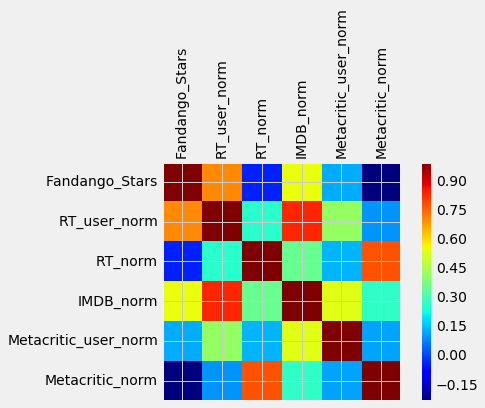

In [23]:
fig, axes = plt.subplots()

rankings_lst = ['Fandango_Stars', 'RT_user_norm', 'RT_norm', 'IMDB_norm', 'Metacritic_user_norm', 'Metacritic_norm']

cax = axes.matshow(fandango[only_rt_80][rankings_lst].corr())

axes.set_yticklabels(['']+rankings_lst)
axes.set_xticklabels(['']+rankings_lst, rotation=90)

fig.colorbar(cax)

plt.show()
plt.close()


## [4] Scatter plots

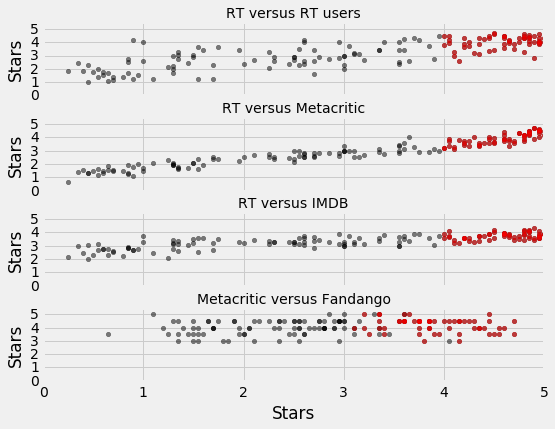

In [24]:
fig, axes = plt.subplots(nrows=4, sharex=True, sharey=True, figsize=(8.,6.))

axes[0].scatter(fandango['RT_norm'], fandango['RT_user_norm'], color='black', alpha=0.5)
axes[0].scatter(fandango[only_rt_80]['RT_norm'], fandango[only_rt_80]['RT_user_norm'], color='red', alpha=0.5)
axes[0].set_ylabel('Stars')
axes[0].set_xlim([0.,5.])
axes[0].set_ylim([0.,5.5])
axes[0].set_title('RT versus RT users', fontsize=14)

axes[1].scatter(fandango['RT_norm'], fandango['Metacritic_norm'], color='black', alpha=0.5)
axes[1].scatter(fandango[only_rt_80]['RT_norm'], fandango[only_rt_80]['Metacritic_norm'], color='red', alpha=0.5)
axes[1].set_ylabel('Stars')
axes[1].set_title('RT versus Metacritic', fontsize=14)

axes[2].scatter(fandango['RT_norm'], fandango['IMDB_norm'], color='black', alpha=0.5)
axes[2].scatter(fandango[only_rt_80]['RT_norm'], fandango[only_rt_80]['IMDB_norm'], color='red', alpha=0.5)
axes[2].set_ylabel('Stars')
axes[2].set_title('RT versus IMDB', fontsize=14)

axes[3].scatter(fandango['Metacritic_norm'], fandango['Fandango_Stars'], color='black', alpha=0.5)
axes[3].scatter(fandango[only_rt_80]['Metacritic_norm'], fandango[only_rt_80]['Fandango_Stars'], color='red', alpha=0.5)
axes[3].set_ylabel('Stars')
axes[3].set_xlabel('Stars')
axes[3].set_title('Metacritic versus Fandango', fontsize=14)

plt.subplots_adjust(hspace=0.3)

plt.show()
plt.close()



## Machine learning
## [1] Linear regression with scikit-learn
